# Template for hand-in on private clustering

Advanced Topics in Machine Learning, U. Copenhagen, fall 2023

Created by Rasmus Pagh

# Fetch and load dataset

The dataset consists of 3414 embedding vectors for first names from the GloVe dataset. Each vector is a 100-dimensional unit vector.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

input_file = "glove.twitter.27B.100d.names.pickle"
with open(input_file, 'rb') as f:
    embedding = pickle.load(f)
names = list(embedding.keys())
points = np.array([ embedding[x] for x in names ])
n, d = points.shape

# Non-private implementation of cost computation and k-means algorithm

In [9]:
def compute_cost(points, centers):
    distances_squared = np.sum((points - centers[:,np.newaxis])**2, axis=-1)
    return np.mean(np.min(distances_squared, axis=0))

def auto_cal_sigma(rho):
    sigma_sq = 3 / rho
    sigma = np.sqrt(sigma_sq)
    
    return sigma

def k_means(points, k, t, rho):
    n, d = points.shape
    initial_assignment = np.random.choice(range(k), n)
    cluster_indexes = [ (initial_assignment == i) for i in range(k) ]
    cluster_sizes = [ cluster_indexes[i].sum() for i in range(k) ]
    sigma = auto_cal_sigma(rho)
    
    for l in range(t):
        cluster_sums = [ np.sum(points[cluster_indexes[i]], axis=0) for i in range(k) ]
        centers = np.array([ cluster_sums[i] / max(1, cluster_sizes[i]) + np.random.normal(0,sigma,d) for i in range(k) ])
        distances_squared = np.sum((points - centers[:,np.newaxis])**2, axis=-1)
        assignment = np.argmin(distances_squared, axis=0)
        cluster_indexes = [ (assignment == i) for i in range(k) ]
        cluster_sizes = [ cluster_indexes[i].sum() + np.random.normal(0,sigma) for i in range(k) ]

    return centers

# Plot cost as function of number of iterations

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei


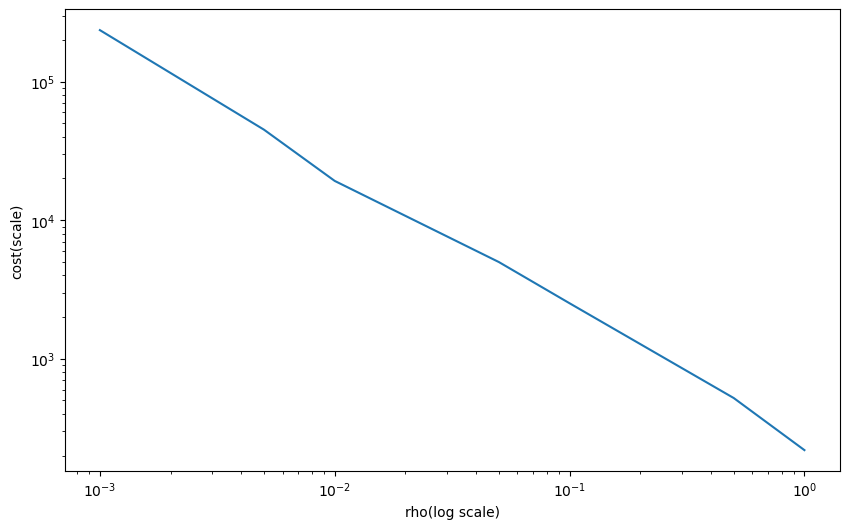

In [25]:
k = 5 # Number of clusters
t = 5

t_range = range(1,10)
rho_range = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
costs = []

for rho in rho_range:
    centers = k_means(points, k, t, rho)
    costs.append(compute_cost(points, centers))
    

# for t in t_range: # number of iterations
#     centers = k_means(points, k, t, 0.001)
#     costs.append(compute_cost(points, centers))

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('rho(log scale)')
ax.set_ylabel('cost(scale)')
ax.plot(rho_range, costs)
plt.xscale('log')
plt.yscale('log')
plt.show()
